In [454]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import itertools
import warnings
from imblearn.over_sampling import SMOTE
warnings.simplefilter('ignore')
%run -i 'functions.py'

In [95]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
JFK = df[df['ORIGIN_STATE_ABR'] == 'NY']

In [79]:
JFK

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
1,1,1,24,4,2019-01-24,1,1323,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1523.0,-5.0,1832.0,-35.0,0.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
3,1,1,24,4,2019-01-24,1,1523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1658.0,26.0,1959.0,-6.0,0.0,333.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
4,1,1,24,4,2019-01-24,1,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2107.0,83.0,23.0,66.0,0.0,335.0,2475.0,1.0,0.0,0.0,0.0,65.0,True,False,False,2,True,False,False,False,True
5,1,1,24,4,2019-01-24,1,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2317.0,97.0,326.0,137.0,0.0,344.0,2475.0,0.0,0.0,40.0,0.0,97.0,True,False,False,2,False,False,True,False,True
6,1,1,24,4,2019-01-24,1,1823,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2237.0,-3.0,215.0,10.0,0.0,343.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25653,4,12,30,1,2019-12-30,1,1923,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,925.0,-4.0,1236.0,-23.0,0.0,324.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25655,4,12,30,1,2019-12-30,1,2123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1440.0,131.0,1755.0,121.0,0.0,335.0,2475.0,121.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25658,4,12,31,2,2019-12-31,1,23,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,520.0,-10.0,823.0,-33.0,0.0,335.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25660,4,12,31,2,2019-12-31,1,123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,651.0,-9.0,1015.0,-18.0,0.0,321.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


In [96]:
airlines = {'OP_UNIQUE_CARRIER' : {'B6':1 ,'AA':2, 'AS':3, 'DL':4 }}

In [97]:
airline=JFK.replace(airlines,inplace=True)

In [455]:
percentage(JFK)

percentage of cancelled flights 0.5310840362386754
percentage of delay flights 27.25710715401437
percentage of ontime fights 72.21180880974696


3    9246
2    3490
1      68
Name: class, dtype: int64


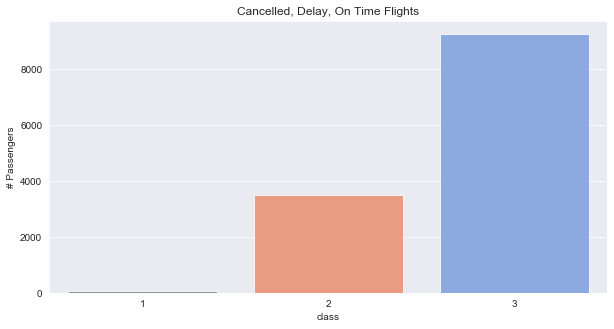

In [450]:
airportgraph(JFK)

In [430]:
X = JFK[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= JFK['class']

[0.01296643 0.02722187 0.03505277 0.02796507 0.02311425 0.03316831
 0.         0.11573114 0.48018523 0.06440579 0.1235231  0.01117202
 0.04549403 0.        ]


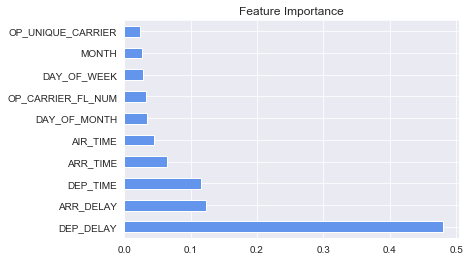

In [433]:
featureimport(X,y)

# Baseline Model

In [456]:
X = JFK[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= JFK['class']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)


In [459]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.3339342045966652

In [393]:
datatable(y_test,dummy_pred)

,Micro,Macro,Weighted
Precison,0.33093,0.110310,0.109515
Recall,0.33093,0.333333,0.330930
F1 Score,0.33093,0.165764,0.164569


In [394]:
cm = confusion_matrix(y_test,dummy_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[1836    0    0]
 [1873    0    0]
 [1839    0    0]]


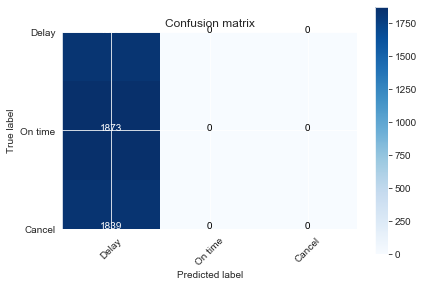

In [395]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

DEP delay has a heav impact on determining whether a flight classifies as one of the categtoies 

In [115]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8413842826243692


In [122]:
y_test.value_counts()

2    1873
3    1839
1    1836
Name: class, dtype: int64

In [444]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[1836    0    0]
 [   0 1292  581]
 [   0  299 1540]]


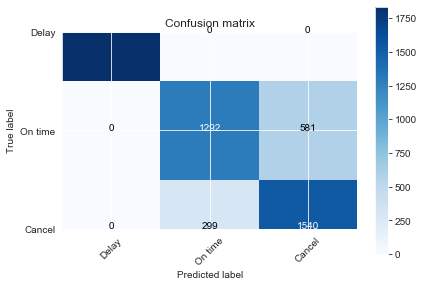

In [445]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [365]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.841384,0.846047,0.845755
Recall,0.841384,0.842405,0.841384
F1 Score,0.841384,0.841245,0.840576


# Hyperparameter Tuning Logisitc Regression

In [483]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[.009,0.01,.09,1,5,10,25,100,200,1000,5000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.009, 0.01, 0.09, 1, 5, 10, 25, 100, 200, 1000,
                               5000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [484]:
grid_clf_acc.best_params_

{'C': 5, 'penalty': 'l2'}

In [487]:
refclf = LogisticRegression(C=5,penalty='l2')
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [490]:
cm = confusion_matrix(y_test,refpred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[1836    0    0]
 [   0 1304  569]
 [   0  296 1543]]


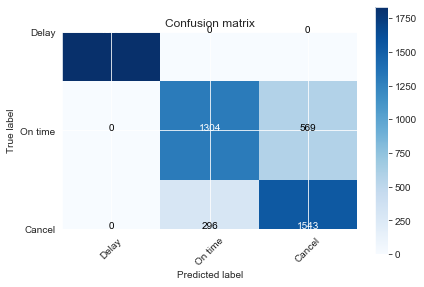

In [491]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [493]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.844088,0.848529,0.848242
Recall,0.844088,0.845084,0.844088
F1 Score,0.844088,0.844001,0.843347


# Random Forest

In [402]:

rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.9388968997837058

In [403]:
datatable(y_test,test_pred)

,Micro,Macro,Weighted
Precison,0.938897,0.939155,0.938983
Recall,0.938897,0.939162,0.938897
F1 Score,0.938897,0.939116,0.938897


# Hyperparameter Tuning Random Forest

In [404]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [406]:

# Instantiate a GridSearch to tune model
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [407]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [460]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=5, min_samples_leaf=2,n_estimators=100,
                                bootstrap= False,random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [461]:
refined_pred = rfc_ref.predict(X_test)


In [462]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.944665,0.944861,0.944687
Recall,0.944665,0.944884,0.944665
F1 Score,0.944665,0.944862,0.944666
